In [282]:
%matplotlib inline

import notebook
from notebook.nbextensions import enable_nbextension
enable_nbextension('notebook', 'usability/codefolding/main')
import numpy as np
from astropy.time import Time
from astropy.io import fits
import glob
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/vs/Dropbox/Python')

bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })

In [283]:
#input_target = sys.argv[1]
#input_channel = sys.argv[2]
#catalog = sys.argv[3]

input_target = 'omegaCen_3'
input_channel = '4p5um'
catalog = 'kaluzny_field3_ch2.als'

In [284]:
if (input_channel == '1' or input_channel == '3p6um'):
	channel = '3p6um'
if (input_channel =='2' or input_channel == '4p5um'):
	channel = '4p5um'

In [285]:
path = '/Volumes/Khaleesi/CRRP/Globular_Cluster_Output/omegaCen/'+ input_target +'_'+ channel + '/' + input_target + '_e*_' + channel + '_dn.fits'
input_image_list = glob.glob(path)
input_lc_data = input_target + '_' + channel + '.cal'

mjds = np.zeros(len(input_image_list))

for count in range(0, len(input_image_list)):
	hdulist = fits.open(input_image_list[count])
	prihdr = hdulist[0].header
	date_obs = Time(prihdr['date_obs'])
	mjds[count] = date_obs.mjd

epoch1_ids, kal_ids = np.loadtxt(input_target + '_' + channel + '_rrl.tfr', skiprows=14, usecols=(0, 15), unpack=True)
k_ids, periods = np.loadtxt(catalog, usecols=(0,5), unpack=True)
with open(input_lc_data) as input:
	lines = []
	while True:
		line = list(itertools.islice(input, 3))
		if line:
			lines.append(line)
		else:
			break

num_stars = len(lines)


In [286]:
kaluzny = pd.read_csv('kaluzny_catalogues/kaluzny2004_reformatted', delim_whitespace=True, header=None, names=('ID', 'RA', 'Dec', 'Period', 'Vmag', 'Type'))

In [287]:
#path

In [288]:
#mjds

In [289]:
kaluzny

,ID,RA,Dec,Period,Vmag,Type
0,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0
1,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0
2,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0
3,V7,13:27:00.90,-47:14:00.5,0.713000,14.08,RR0
4,V8,13:27:48.45,-47:28:20.3,0.521329,13.90,RR0
5,V9,13:25:59.58,-47:26:24.0,0.523480,14.10,RR0
6,V10,13:26:06.99,-47:24:36.6,0.374976,14.31,RR1
7,V11,13:26:30.59,-47:23:01.6,0.564789,14.20,RR0
8,V12,13:26:27.21,-47:24:06.2,0.386769,14.32,RR1
9,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0


In [290]:
als_file = input_target + '_e1_' + channel + '_dn.cal'
als_df = pd.read_csv(als_file, delim_whitespace=True, header=None, names=('als_id', 'xc', 'yc', 'mag', 'err', 'lcorr'))

In [291]:
als_df

,als_id,xc,yc,mag,err,lcorr
0,15,19.25,566.06,15.793,0.248,0.970
1,16,19.40,344.68,10.589,0.113,1.012
2,17,19.86,164.18,13.553,0.070,1.013
3,18,20.12,536.72,13.371,0.082,0.978
4,19,20.43,203.60,12.693,0.113,1.016
5,20,20.48,80.88,11.075,0.116,1.004
6,21,20.51,159.59,14.363,0.146,1.013
7,22,20.54,518.25,12.000,0.065,0.983
8,23,20.64,149.50,14.238,0.124,1.012
9,24,20.85,492.24,13.609,0.091,0.989


In [292]:
#input_image_list

In [293]:
kaluzny.ID[kaluzny['Period'].isin(period)].values[0]



'V277'

In [294]:
period


array([ 0.351563])

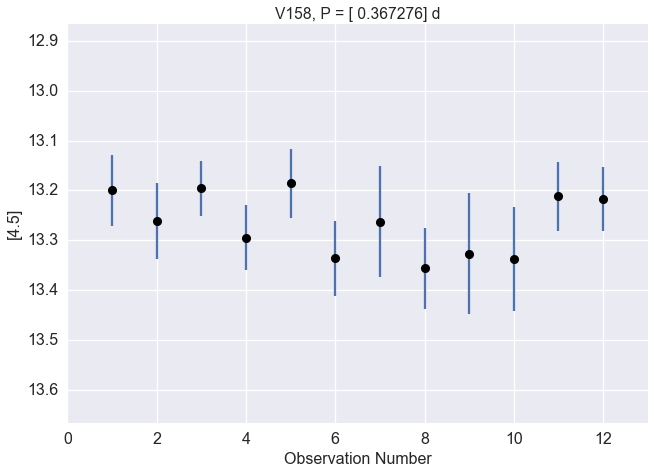

In [295]:
for rrl in range(len(epoch1_ids)):
    k_a_id = kal_ids[rrl]
    ep1_id = epoch1_ids[rrl]
    period = periods[np.where(kal_ids==k_a_id)]
    #df.loc[df['column_name'] == some_value]
    cat_id = kaluzny.ID[kaluzny['Period'].isin(period)].values[0]
    kaluzny.loc[kaluzny['ID'] == cat_id, 'als_id'] = ep1_id   
    num_frames = 12
    objects = np.zeros((num_stars, (num_frames*2) + 3))
    for star in np.arange(0,num_stars):
        data = "".join(lines[star])
        data = data.split()
        objects[star][0] = data[0] ## ID
        objects[star][1] = data[1] ## XC
        objects[star][2] = data[2] ## YC
        for epoch in np.arange(0,(num_frames*2), 2):
            objects[star][epoch + 3]  = data[epoch + 3] ## mag
            objects[star][epoch + 4] = data[epoch + 4] ## err
        if objects[star][0] == epoch1_ids[rrl]:
            best_star = star
            break
    mag = np.zeros(num_frames)
    err = np.zeros(num_frames)
    for epoch in np.arange(0,num_frames):
        mag[epoch] = objects[best_star][(epoch*2) + 3]  
        err[epoch] = objects[best_star][(epoch*2) + 4] 
    #print 'matched star' + str(k_a_id) + 'to ' + str(cat_id) + 'with period ' + str(period)
    idx = np.argsort(mjds)
    mjds = mjds[idx]
    mag = mag[idx]
    err = err[idx]
    phase = (mjds / period) - np.floor(mjds / period)
    phase = np.concatenate((phase,(phase+1.0),(phase+2.0),(phase+3.0),(phase+4.0)))
    
    mag_long  = np.concatenate((mag, mag, mag, mag, mag))
    
    err_long = np.concatenate((err, err, err, err, err))
    obs = np.arange(1, num_frames+1, 1)


    output = 'plots/' + str(cat_id) + '_rrlyrae.data'
    output_file = open(output, "w")

    for frame in np.arange(0, num_frames):
        output_file.write("{0:.8f} {1:.3f} {2:.3f} \n".format(mjds[frame], mag[frame], err[frame]))
    
    output_file.close()
    ## Sanity check plot

    mp.close()
    mp.clf()
    axp1 = mp.subplot(111)

    axp1.axis([0,2.5,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])


    axp1.errorbar(phase, mag_long, yerr=err_long, ls='None')
    axp1.plot(phase, mag_long, 'ko', ls='None')
    mp.xlabel("Phase")
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(cat_id + ', P = ' + str(period) +' d')
    #mp.show()

    mp.savefig('plots/' + str(cat_id) +'.pdf')

    mp.close()
    mp.clf()
    axp2 = mp.subplot(111)
    axp2.invert_yaxis()

    dates = np.concatenate((mjds, mjds, mjds, mjds, mjds))
    axp2.axis([0,num_frames+1,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])
    axp2.errorbar(obs, mag, yerr=err, ls='None')

    axp2.plot(obs, mag, 'ko', ls='None')
    mp.xlabel('Observation Number')
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(cat_id + ', P = ' + str(period) +' d')
    mp.savefig('plots/' + str(cat_id) +'_timeseries.pdf')


In [296]:
#print kaluzny.ID[kaluzny['Period'].isin(period)].values[0]


In [297]:
#str(cat_id)



In [298]:
len(epoch1_ids)

26

In [299]:
sum(kaluzny.als_id>0)

26

In [300]:
outfile = input_target + '_' + channel + '_rrl' + '_matched_to_kaluzny.cal'
print outfile


omegaCen_3_4p5um_rrl_matched_to_kaluzny.cal


In [301]:
#als_df

In [302]:
#kaluzny

In [303]:
merged_tables = als_df.merge(kaluzny, on='als_id')

In [304]:
merged_tables

,als_id,xc,yc,mag,err,lcorr,ID,RA,Dec,Period,Vmag,Type
0,243,48.12,541.38,14.157,0.094,0.980,V156,13:26:47.92,-47:31:52.5,0.359067,14.33,RR1
1,263,50.82,207.40,12.585,0.066,1.020,V40,13:26:24.56,-47:30:46.2,0.634072,13.88,RR0
2,413,74.10,207.87,13.209,0.135,1.023,V44,13:26:22.39,-47:34:35.3,0.567545,14.17,RR0
3,506,89.55,523.95,12.927,0.096,1.003,V131,13:26:30.07,-47:29:40.7,0.392252,14.29,RR1
4,806,128.66,378.92,13.664,0.072,1.017,V119,13:26:38.29,-47:31:18.0,0.305876,14.54,RR1
5,882,139.58,94.90,14.877,0.197,1.009,V26,13:26:23.64,-47:26:59.4,0.784720,14.20,RR0
6,943,147.05,370.54,13.432,0.099,1.019,V118,13:26:40.56,-47:30:19.1,0.611618,13.82,RR0
7,955,148.44,166.72,13.240,0.107,1.019,V34,13:26:07.21,-47:33:10.4,0.733967,14.05,RR0
8,1079,161.18,360.05,14.508,0.154,1.020,V115,13:26:12.30,-47:34:17.5,0.630474,13.90,RR0
9,1585,224.70,524.98,12.823,0.074,0.996,V135,13:26:28.14,-47:29:17.6,0.632579,14.03,RR0


In [305]:
merged_tables.to_csv(outfile, sep='\t', header=True, index=False)

In [306]:
epoch1_ids

array([ 7894.,  9164.,   882.,  4549.,  2732.,   955.,   263.,   413.,
        3072.,  8834.,  2217.,  7477.,  5361.,  1079.,  1985.,   943.,
         806.,  5210.,  2394.,  2269.,  1990.,   506.,  1585.,  2273.,
         243.,  8630.])

In [307]:
rrl

25

In [308]:
kal_ids

array([  9.,   1.,  34.,   8.,  20.,  17.,  16.,  28.,  18.,  10.,  19.,
        13.,  14.,  35.,   7.,  32.,  22.,   6.,  33.,  21.,  11.,   2.,
        15.,   5.,  12.,  30.])

In [309]:
len(kal_ids)

26

In [310]:
range(len(epoch1_ids))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [311]:
periods

array([ 0.377114,  0.588364,  0.78472 ,  0.61568 ,  0.40441 ,  0.733967,
        0.634072,  0.567545,  0.604627,  0.568023,  0.518506,  0.61977 ,
        0.344497,  0.630474,  0.421641,  0.611618,  0.305876,  0.548537,
        0.304182,  0.634929,  0.834988,  0.392252,  0.632579,  0.619849,
        0.359067,  0.367276,  0.321299,  0.321398,  0.4226  ,  0.329014,
        0.334   ,  0.301322,  0.297775,  0.99991 ,  0.309782])

In [312]:
len(periods)

35